# <font color='green'>Projet 4 : Segmentez des clients d'un site e-commerce</font>

# Partie 2 : Stabilité des clusters

In [2]:
# importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from datetime import timedelta
from sklearn.cluster import KMeans
import datetime
from sklearn import metrics

In [3]:
# chargement des fichiers (tous les clients)

df = pd.read_csv('C:\\Users\\mfila\\df_client_full_model.csv')

In [4]:
df.head()

,customer_unique_id,last_purchase_date,recency,frequency,mean_price,sum_price,geolocation_lat,geolocation_lng,mean_delivery_days,mean_delivery_late,avg_review_score,mean_n_item,main_product_category,main_payment_type,mean_payment_installments,customer_city
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90,141.90,-23.340235,-46.830140,6.0,False,5.0,1.0,home,credit_card,8.0,cajamar
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115,1,27.19,27.19,-23.559115,-46.787626,3.0,False,4.0,1.0,health_beauty,credit_card,1.0,osasco
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.22,86.22,-27.542880,-48.633426,25.0,False,3.0,1.0,other,credit_card,8.0,sao jose
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.62,43.62,-1.312214,-48.483159,20.0,False,4.0,1.0,high_technology,credit_card,4.0,belem
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.89,196.89,-23.505548,-47.469705,13.0,False,5.0,1.0,high_technology,credit_card,6.0,sorocaba


In [5]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'],
                                    format='%Y-%m-%d %H:%M:%S')

In [6]:
t_first = df['last_purchase_date'].min()
t_last = df['last_purchase_date'].max()

print("First command of the order database: ", t_first)
print("Last command of the order database: ", t_last)

First command of the order database:  2016-10-03 16:56:50
Last command of the order database:  2018-08-29 15:00:37


In [9]:
# Function to create client dataset from a specific date
def time_selection(date_limit, df):
    mask = df['last_purchase_date'] <= date_limit
    df = df.loc[mask]

    # Snapshot of the last order timestamp
    snapshot_date_ref = df['last_purchase_date']\
        .max() + timedelta(days=1)

    # Clustering model features caculating
    df = df.groupby(['customer_unique_id']).apply(lambda x: pd.Series({
        'recency': (snapshot_date_ref
                    - x['last_purchase_date'].max()).days,
        'frequency': x['frequency'].count(),
        'sum_price': x['sum_price'].sum(),
        'avg_review_score': x['avg_review_score'].mean(),
        'mean_n_item': x['mean_n_item'].mean(),
        'mean_payment_installments': x['mean_payment_installments'].mean(),

    }))


    return(df)

2017-04-21 16:56:50
(6130, 6)
Days later: 0
ARi:  1.0 

2017-05-21 16:56:50
(9054, 6)
Days later: 30
ARi:  0.99 

2017-06-20 16:56:50
(12168, 6)
Days later: 60
ARi:  0.98 

2017-07-20 16:56:50
(15338, 6)
Days later: 90
ARi:  0.99 

2017-08-19 16:56:50
(19038, 6)
Days later: 120
ARi:  0.98 

2017-09-18 16:56:50
(22802, 6)
Days later: 150
ARi:  0.96 

2017-10-18 16:56:50
(26837, 6)
Days later: 180
ARi:  0.91 

2017-11-17 16:56:50
(31065, 6)
Days later: 210
ARi:  0.92 

2017-12-17 16:56:50
(38877, 6)
Days later: 240
ARi:  0.92 

2018-01-16 16:56:50
(43969, 6)
Days later: 270
ARi:  0.92 

2018-02-15 16:56:50
(50267, 6)
Days later: 300
ARi:  0.92 

2018-03-17 16:56:50
(56962, 6)
Days later: 330
ARi:  0.89 

2018-04-16 16:56:50
(63265, 6)
Days later: 360
ARi:  0.89 

2018-05-16 16:56:50
(70735, 6)
Days later: 390
ARi:  0.89 

2018-06-15 16:56:50
(76034, 6)
Days later: 420
ARi:  0.89 

2018-07-15 16:56:50
(81188, 6)
Days later: 450
ARi:  0.9 

2018-08-14 16:56:50
(88705, 6)
Days later: 480
AR

Text(0, 0.5, 'ARI')

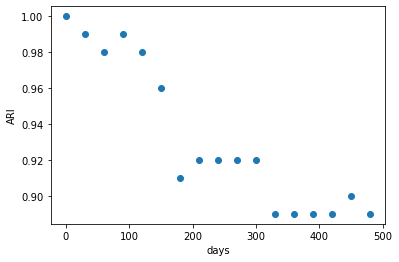

In [20]:
# Algorithme to check etime stability
model_fin = KMeans(n_clusters=5,
                   random_state=123)
# Initialisation
T0 = df['last_purchase_date'].min() \
    + datetime.timedelta(days=200)

F0 = time_selection(date_limit=T0,
                    df=df)

scaler = RobustScaler()

F0_scaled = scaler.fit_transform(F0)

kmeans = model_fin


ari_list = []
day_list = []

max_days = (df['last_purchase_date'].max() - T0).days

# Loop on every 30 days
for day in np.arange(0, max_days + 1, 30):

    T1 = T0 + datetime.timedelta(days=np.float64(day))
    print(T1)

    day_list.append(day)

    F1 = time_selection(date_limit=T1,
                        df=df)
    print(F1.shape)

    F1_scaled = scaler.fit_transform(F1)

    C1_new = kmeans.fit_predict(F1_scaled)

    M0 = kmeans.fit(F0_scaled)
    C1_init = M0.predict(F1_scaled)

    ari = round(metrics.adjusted_rand_score(C1_new,
                                            C1_init),
                2)

    print('Days later:', day)
    print('ARi: ', ari, '\n')

    ari_list.append(ari)

plt.scatter(x=day_list,
            y=ari_list)
plt.xlabel('days')
plt.ylabel('ARI')

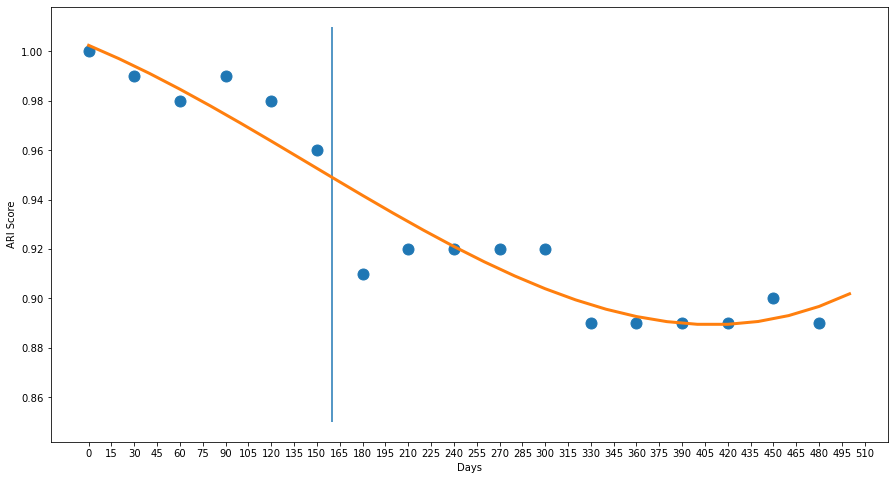

In [27]:
# Visualisation of ARI time evolution

plt.figure(figsize=(15, 8))
plt.plot(day_list, ari_list, 'o', ms=11)

model1 = np.poly1d(np.polyfit(day_list, ari_list, 3))
polyline = np.arange(0, 520, 20)

plt.plot(polyline,
         model1(polyline),
         '-',
         linewidth=3)

plt.vlines(x=160, ymin=.85, ymax=1.01)

plt.ylabel("ARI Score")
plt.xlabel("Days")
plt.xticks(np.arange(0, 520, 15))
plt.show()

Les prédictions sont stables, Ari score ne baisse pas en dessous de 0.8, il est néanmoins conseillé de mettre à jour le modèle chaque 5-6 mois (baisse de score).